In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [18]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
db_session = Session(engine)

In [20]:
# identify measurement columns
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column["name"],column["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [21]:
# identify station columns
station_columns = inspector.get_columns('station')
for column in station_columns:
    print(column["name"],column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [26]:
# Find the most recent date in the data set.
recent_date = db_session.query(measurement.date).order_by(measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
prcp_last_year = db_session.query(measurement.date, measurement.prcp).filter(measurement.date >= '2016-08-24').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_last_year, columns = ["Date", "Precipitation"])

# Sort the dataframe by date
prcp_df = prcp_df.sort_values(by = "Date")
prcp_df.head()



,Date,Precipitation
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15


In [46]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


Text(0, 0.5, 'Prec. in Inches')

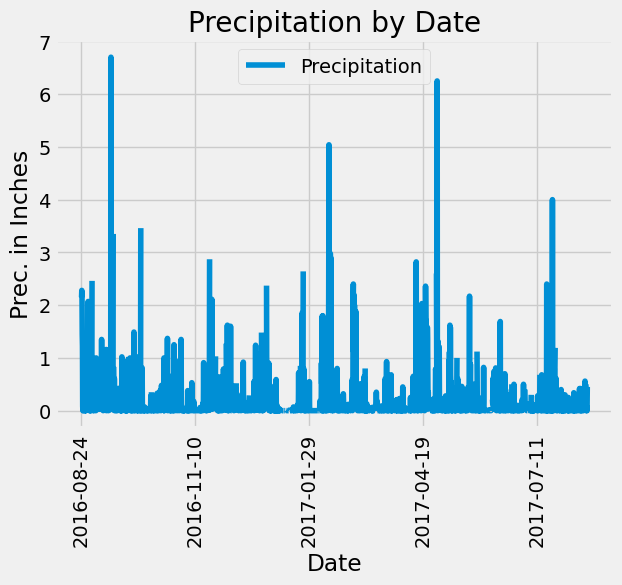

In [79]:
#plot precipitation data
prcp_df.plot("Date", "Precipitation")
plt.title("Precipitation by Date")
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Prec. in Inches")

# Exploratory Station Analysis

In [50]:
# Design a query to calculate the total number of stations in the dataset
station_numbers = db_session.query(station.id).count()
print(station_numbers)

9


In [72]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = db_session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [62]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_id = 'USC00519281'
station9281_info = db_session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)
                                    .filter(measurement.station==station_id)).all()
station9281_info

[(53.0, 87.0, 71.66378066378067)]

In [75]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_last_year = db_session.query(measurement.date,measurement.tobs).filter(measurement.date >= '2016-08-24', measurement.station==station_id).all()
temp_df = pd.DataFrame(temp_last_year, columns = ["Date","Temp"])
temp_df.head()

,Date,Temp
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0


Text(0, 0.5, 'Count (Days)')

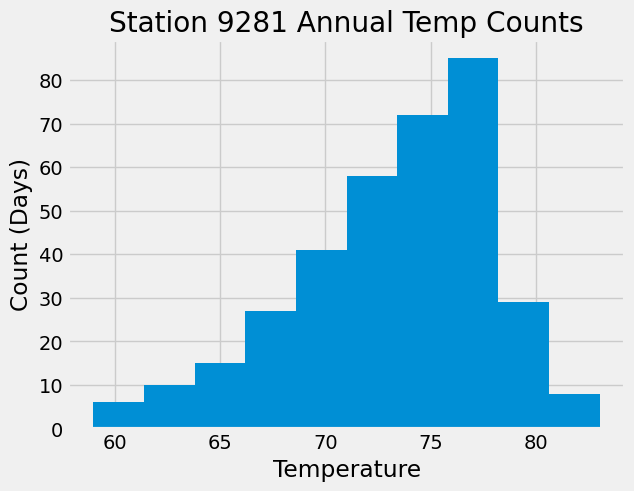

In [80]:
temp_df.hist()
plt.title("Station 9281 Annual Temp Counts")
plt.xlabel("Temperature")
plt.ylabel("Count (Days)")

# Close Session

In [82]:
# Close Session
db_session.close()